In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
print(f'Tensorflow: {tf.__version__}\nKeras: {keras.__version__}')

Tensorflow: 2.16.1
Keras: 3.3.3


In [2]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [3]:
!pip install wget

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=7fecfc79be6252a2ac0568178bcc737b013edb3d8421a81d073f1606c9010d1c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [4]:
data = './'

train_link = data + 'train.p'

valid_link = data + 'valid.p'

test_link = data + 'test.p'

In [8]:
import wget

wget.download(link)
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [9]:
import pickle

with open(train_link , mode = 'rb') as f:
 train = pickle.load(f)
with open(valid_link , mode = 'rb') as f:
 valid = pickle.load(f)
with open(test_link , mode = 'rb') as f:
 test = pickle.load(f)

In [11]:
x_train = train['features']
y_train = train['labels']

x_valid = valid['features']
y_valid = valid['labels']

x_test = test['features']
y_test = test['labels']

x_train.shape , x_valid.shape , x_test.shape

((34799, 32, 32, 3), (4410, 32, 32, 3), (12630, 32, 32, 3))

In [12]:
class_name = {0: 'Speed limit (20km/h)',

 1: 'Speed limit (30km/h)',

 2: 'Speed limit (50km/h)',

 3: 'Speed limit (60km/h)',

 4: 'Speed limit (70km/h)',

 5: 'Speed limit (80km/h)',

 6: 'End of speed limit (80km/h)',

 7: 'Speed limit (100km/h)',

 8: 'Speed limit (120km/h)',

 9: 'No passing',

 10: 'No passing for vehicles over 3.5 metric tons',

 11: 'Right-of-way at the next intersection',

 12: 'Priority road',

 13: 'Yield',

 14: 'Stop',

 15: 'No vehicles',

 16: 'Vehicles over 3.5 metric tons prohibited',

 17: 'No entry',

 18: 'General caution',

 19: 'Dangerous curve to the left',

 20: 'Dangerous curve to the right',

 21: 'Double curve',

 22: 'Bumpy road',

 23: 'Slippery road',

 24: 'Road narrows on the right',

 25: 'Road work',

 26: 'Traffic signals',

 27: 'Pedestrians',

 28: 'Children crossing',

 29: 'Bicycles crossing',

 30: 'Beware of ice/snow',

 31: 'Wild animals crossing',

 32: 'End of all speed and passing limits',

 33: 'Turn right ahead',

 34: 'Turn left ahead',

 35: 'Ahead only',

 36: 'Go straight or right',

 37: 'Go straight or left',

 38: 'Keep right',

 39: 'Keep left',

 40: 'Roundabout mandatory',

 41: 'End of no passing',

 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [55]:
def plot_data (x_data , y_data):
  fig ,ax = plt.subplots(2,4)
  count = 0
  for i in range(0,2):
    for j in range(0,4):
        ax[i,j].imshow(x_data[count])
        ax[i,j].set_xlabel(class_name[y_data[count]] , fontsize = 7)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        count+=1

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

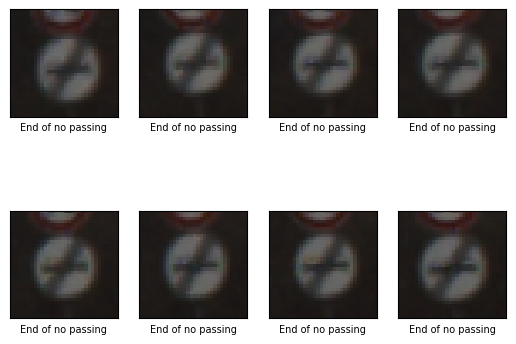

In [47]:
plot_data(x_train,y_train)

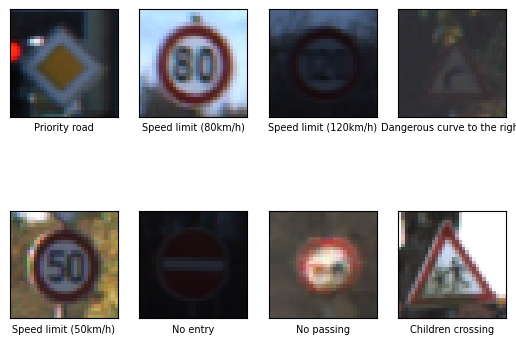

In [56]:
from sklearn.utils import shuffle

x_train,y_train = shuffle(x_train,y_train)
plot_data(x_train,y_train)

In [13]:
x_train = x_train.astype('float32') / 255

x_valid = x_valid.astype('float32') / 255

x_test = x_test.astype('float32') / 255

In [14]:
from keras.utils import to_categorical

y_train_onehot = to_categorical(y_train , len(class_name))
y_valid_onehot = to_categorical(y_valid , len(class_name))
y_test_onehot = to_categorical(y_test , len(class_name))

In [67]:
from keras import layers

input_shape = [32,32,3]

model = keras.models.Sequential([
    layers.Conv2D(32,(3,3) , padding = 'same' , input_shape = input_shape),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(32,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    #layers.Dropout(0.2),

    layers.Conv2D(64,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    #layers.Dropout(0.2),

    layers.Conv2D(64,(3,3) , padding = 'same'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    #layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    #layers.Dropout(0.2),
    layers.Dense(43),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 43)             │        22,059 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range = 0.18,
                         zoom_range = 0.15,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         horizontal_flip = False,
                         fill_mode = 'nearest'
                        )

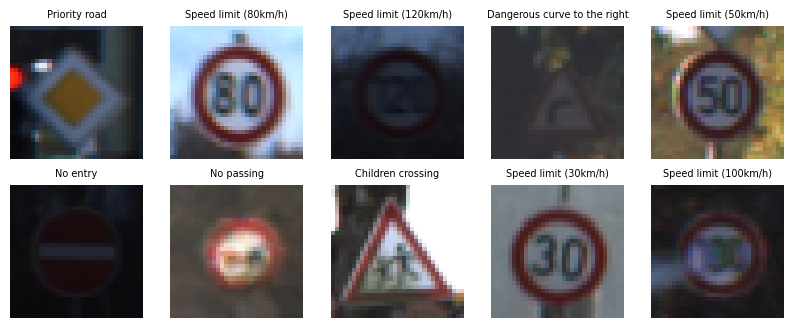

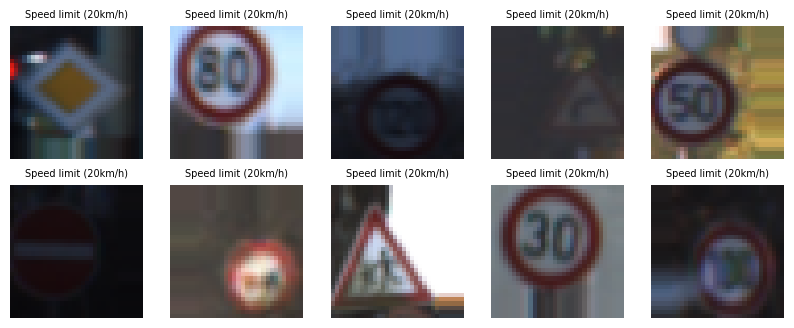

In [61]:
data_x_train = aug.flow(x_train , y_train_onehot , batch_size = 10 , shuffle = False)

plt.figure(figsize=(10, 10))
for i in range(10): 
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_name[y_train[i]] , fontsize = 7)
    plt.axis('off') 
plt.show()

print('\n')

x_batch, y_batch = next(data_x_train)

plt.figure(figsize=(10, 10))
for i in range(10): 
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_batch[i])
    plt.title(class_name[y_batch[i][0]] , fontsize = 7)
    plt.axis('off') 
plt.show()

In [68]:
learning_rate = 0.01

model.compile(
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
)

In [69]:
batch_size = 128
epochs = 50
factor = 0.2

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor = factor, patience = 3, min_lr=1e-6)

history = model.fit(
    aug.flow(x_train, y_train_onehot, batch_size=batch_size),
    validation_data=(x_valid, y_valid_onehot),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs = epochs,
    callbacks = [early_stopping , reduce_lr]
)

Epoch 1/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 30s 89ms/step - accuracy: 0.2669 - loss: 2.9086 - val_accuracy: 0.4331 - val_loss: 2.4272 - learning_rate: 0.0100
Epoch 2/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6875 - loss: 0.9283 - val_accuracy: 0.4268 - val_loss: 2.4247 - learning_rate: 0.0100
Epoch 3/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step - accuracy: 0.7986 - loss: 0.6206 - val_accuracy: 0.8302 - val_loss: 0.6778 - learning_rate: 0.0100
Epoch 4/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9766 - loss: 0.0609 - val_accuracy: 0.8181 - val_loss: 0.6975 - learning_rate: 0.0100
Epoch 5/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - accuracy: 0.9551 - loss: 0.1405 - val_accuracy: 0.9311 - val_loss: 0.2799 - learning_rate: 0.0100
Epoch 6/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9766 - loss: 0.0495 - val_accuracy: 0.9320 - val_loss: 0.2970 - learning_rate: 0.0100
Epoch 7/50
271/271 ━━━━━━━━━━━━━━━━━━━━ 22s 80ms/step - accuracy: 0.9661 - loss:

In [72]:
model.save('vgg_traffic_sign_95.keras')

In [162]:
from keras.applications import VGG16

pre_train_model = VGG16(
    input_shape = [32,32,3],
    include_top = False
)

pre_train_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
last_output = pre_train_model.output
x = layers.Flatten()(last_output)
x = layers.Dense(1024 , activation = 'relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(1024 , activation = 'relu')(x)
x = layers.Dense(512 , activation = 'relu')(x)
#x = layers.Dropout(0.2)(x)
x = layers.Dense(256 , activation = 'relu')(x)
x = layers.Dense(128 , activation = 'relu')(x)
output = layers.Dense(43 , activation = 'softmax')(x)

model_1 = keras.Model(pre_train_model.input , output)
model_1.summary()

Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 128)            │        32,89

 Total params: 16,984,171 (64.79 MB)

 Trainable params: 16,984,171 (64.79 MB)

 Non-trainable params: 0 (0.00 B)

In [164]:
learning_rate = 0.001

model_1.compile(
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = keras.optimizers.Adam(learning_rate = learning_rate),
)

In [165]:
batch_size = 128
epochs = 100
factor = 0.2

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor= factor, patience=3, min_lr=1e-10)

history_1 = model_1.fit(
    aug.flow(x_train, y_train_onehot, batch_size=batch_size),
    validation_data=(x_valid, y_valid_onehot),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs = epochs,
    callbacks = [early_stopping , reduce_lr]
)

Epoch 1/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 34s 98ms/step - accuracy: 0.0745 - loss: 3.4070 - val_accuracy: 0.1862 - val_loss: 2.5584 - learning_rate: 0.0010
Epoch 2/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1484 - loss: 2.6765 - val_accuracy: 0.1832 - val_loss: 2.4384 - learning_rate: 0.0010
Epoch 3/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 24s 87ms/step - accuracy: 0.2780 - loss: 2.1392 - val_accuracy: 0.4118 - val_loss: 1.5442 - learning_rate: 0.0010
Epoch 4/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4297 - loss: 1.4396 - val_accuracy: 0.4116 - val_loss: 1.5268 - learning_rate: 0.0010
Epoch 5/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 25s 91ms/step - accuracy: 0.5007 - loss: 1.3323 - val_accuracy: 0.6082 - val_loss: 1.2806 - learning_rate: 0.0010
Epoch 6/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6172 - loss: 1.2655 - val_accuracy: 0.6283 - val_loss: 1.0919 - learning_rate: 0.0010
Epoch 7/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - accuracy: 0.6682 - 

In [167]:
model_1.save('vgg16_traffic_sign_95.keras')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

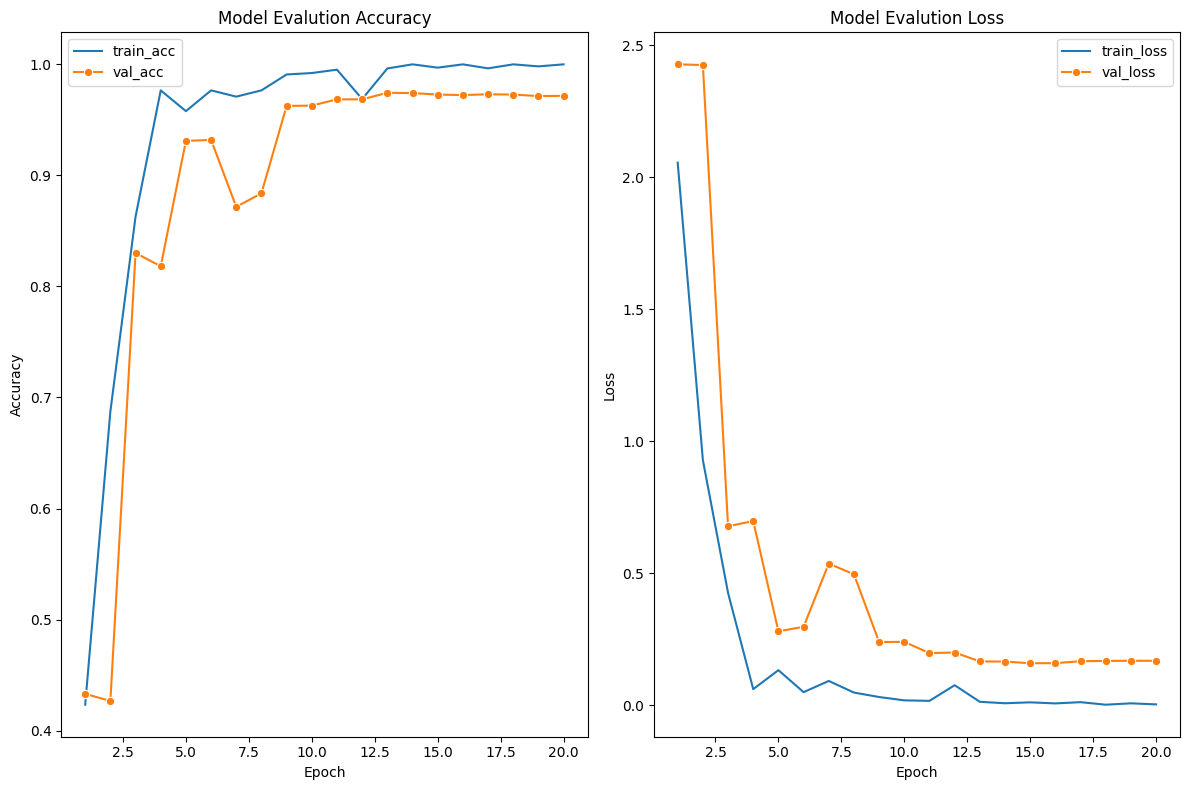

In [173]:
evalution = history.history

train_accuracy = evalution['accuracy']
val_accuracy = evalution['val_accuracy']
train_loss = evalution['loss']
val_loss = evalution['val_loss']

fig ,ax = plt.subplots(1,2 , figsize=(12,8))
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = train_accuracy , label = 'train_acc' , ax = ax[0])
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = val_accuracy , label = 'val_acc' , marker = 'o' , ax = ax[0])

sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = train_loss , label = 'train_loss' , ax = ax[1])
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = val_loss , label = 'val_loss' , marker = 'o' , ax = ax[1])

ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Model Evalution Loss')

ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Model Evalution Accuracy')
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

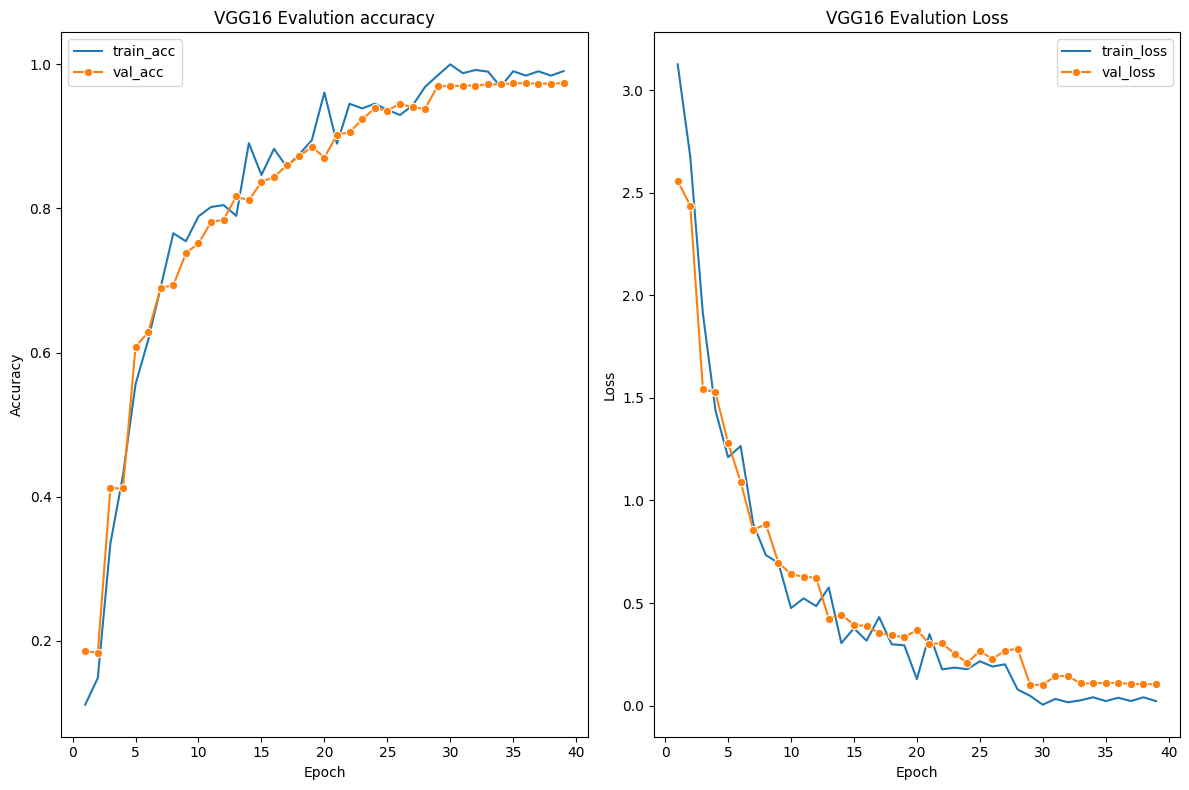

In [176]:
evalution_1 = history_1.history

train_accuracy = evalution_1['accuracy']
val_accuracy = evalution_1['val_accuracy']
train_loss = evalution_1['loss']
val_loss = evalution_1['val_loss']

fig ,ax = plt.subplots(1,2 , figsize=(12,8))
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = train_accuracy , label = 'train_acc' , ax = ax[0])
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = val_accuracy , label = 'val_acc' , marker = 'o' , ax = ax[0])

sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = train_loss , label = 'train_loss' , ax = ax[1])
sns.lineplot(x = range(1,len(train_accuracy) + 1) , y = val_loss , label = 'val_loss' , marker = 'o' , ax = ax[1])

ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('VGG16 Evalution Loss')
#ax[1].set_yticks(np.arange(0,2,0.3))

ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('VGG16 Evalution accuracy')
plt.tight_layout()
#ax[0].set_yticks(np.arange(0.1,1,0.03))

In [177]:
model.evaluate(x_test,y_test_onehot)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.1900


[0.20310236513614655, 0.9559778571128845]

In [179]:
model_1.evaluate(x_test,y_test_onehot)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9510 - loss: 0.2932


[0.296516090631485, 0.9491686224937439]

In [180]:
y_pred_model = model.predict(x_test)
y_pred_model = np.argmax(y_pred_model , axis = -1)

y_pred_model_1 = model_1.predict(x_test)
y_pred_model_1 = np.argmax(y_pred_model_1 , axis = -1)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [63]:
from tensorflow import keras

saved_model = keras.models.load_model('../input/vgg_traffic_sign/keras/default/1/vgg_traffic_sign_95.keras')
saved_model_1 = keras.models.load_model('../input/vgg_16_traffic_sign/tfjs/default/1/vgg16_traffic_sign_95.keras')

y_pred_model = saved_model.predict(x_test)
y_pred_model = np.argmax(y_pred_model , axis = -1)

y_pred_model_1 = saved_model_1.predict(x_test)
y_pred_model_1 = np.argmax(y_pred_model_1 , axis = -1)

I0000 00:00:1729697977.883863     727 service.cc:145] XLA service 0x7f85c800b000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729697977.883925     727 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 95/395 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

I0000 00:00:1729697979.328055     727 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


In [64]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

a = accuracy_score(y_test,y_pred_model)
p = precision_score(y_test,y_pred_model , average='weighted')
r = recall_score(y_test,y_pred_model , average='weighted')

a1 = accuracy_score(y_test,y_pred_model_1)
p1 = precision_score(y_test,y_pred_model_1 , average='weighted')
r1 = recall_score(y_test,y_pred_model_1 , average='weighted')

data = {
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'VGG': [a, p, r],
    'VGG16': [a1, p1, r1]
}
df = pd.DataFrame(data)
df

,Metric,VGG,VGG16
0,Accuracy,0.955978,0.949169
1,Precision,0.957887,0.952000
2,Recall,0.955978,0.949169


In [79]:
from sklearn.metrics import classification_report

report_model = classification_report(y_test,y_pred_model , target_names = class_name.values())
report_model_dict = classification_report(y_test,y_pred_model , target_names = class_name.values() , output_dict=True)

report_model_1 = classification_report(y_test,y_pred_model_1 , target_names = class_name.values())
report_model_1_dict = classification_report(y_test,y_pred_model_1 , target_names = class_name.values() , output_dict=True)

print(report_model)

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.98      0.97      0.97        60
                              Speed limit (30km/h)       0.92      1.00      0.96       720
                              Speed limit (50km/h)       0.93      0.98      0.96       750
                              Speed limit (60km/h)       0.97      0.94      0.96       450
                              Speed limit (70km/h)       1.00      0.96      0.98       660
                              Speed limit (80km/h)       0.94      0.99      0.97       630
                       End of speed limit (80km/h)       1.00      0.87      0.93       150
                             Speed limit (100km/h)       0.98      0.98      0.98       450
                             Speed limit (120km/h)       0.97      0.97      0.97       450
                                        No passing       1.00      0.93      0.

In [80]:
df = pd.DataFrame(report_model_dict).T
df = df.sort_values(by='f1-score')

df.head(5)

,precision,recall,f1-score,support
Double curve,0.659091,0.644444,0.651685,90.0
Pedestrians,0.885714,0.516667,0.652632,60.0
Roundabout mandatory,0.687500,0.855556,0.762376,90.0
Bumpy road,0.857143,0.750000,0.800000,120.0
Beware of ice/snow,0.928058,0.860000,0.892734,150.0


In [23]:
class_name

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

<Axes: >

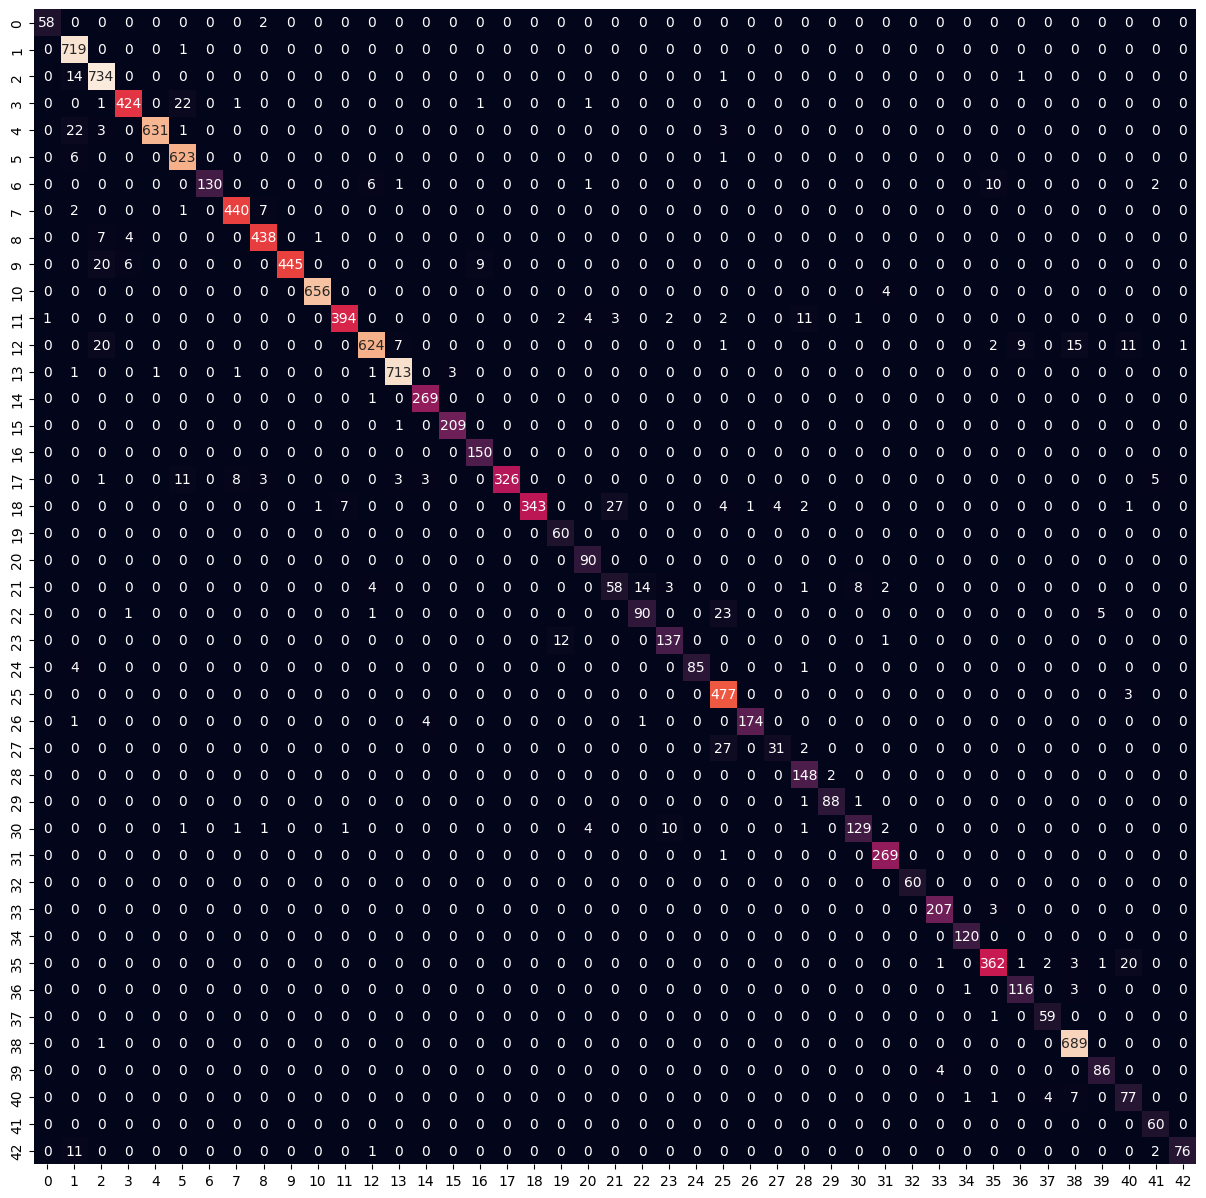

In [74]:
from sklearn.metrics import confusion_matrix

conf_model = confusion_matrix(y_test,y_pred_model)
conf_model_1 = confusion_matrix(y_test,y_pred_model_1)

plt.figure(figsize=(15,15))
sns.heatmap(conf_model , annot = True , fmt = '.0f' , cbar = False)

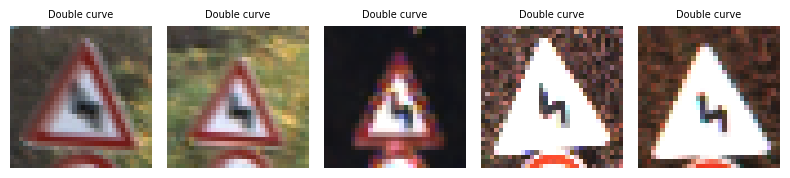

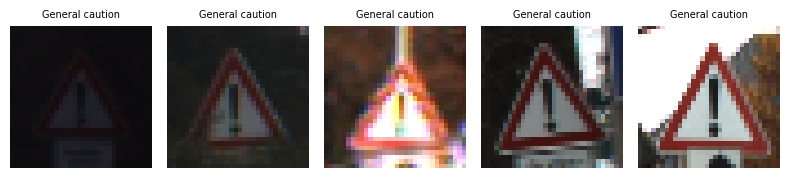

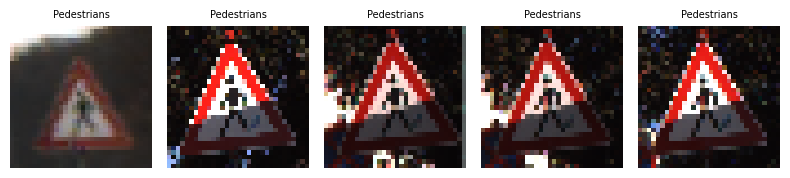

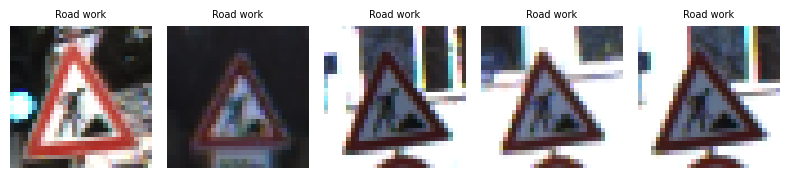

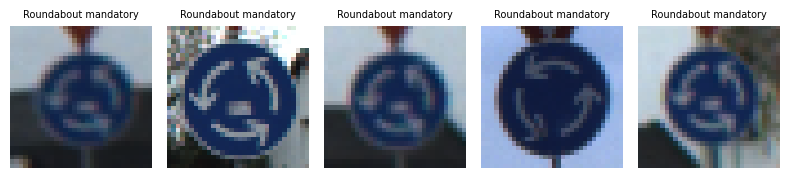

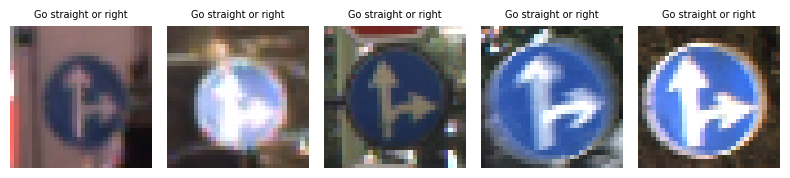

In [77]:
def display_random_images(class_index, x_data, y_data):
    class_indices = np.where(y_data == class_index)[0]
    if len(class_indices) == 0:
        print(f'Not in class')
        return

    random_indices = np.random.choice(class_indices, size=min(5, len(class_indices)), replace=False)
    nrows, ncols = 1, 5
    plt.figure(figsize=(8,6))
    
    for i, idx in enumerate(random_indices):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(x_data[idx]) 
        plt.axis('off')
        plt.title(f'{class_name[class_index]}' , fontsize = 7)
    
    plt.tight_layout()
    plt.show()

display_random_images(class_index=21, x_data=x_test, y_data=y_test)
display_random_images(class_index=18, x_data=x_test, y_data=y_test)
print('\n')
display_random_images(class_index=27, x_data=x_test, y_data=y_test)
display_random_images(class_index=25, x_data=x_test, y_data=y_test)
print('\n')
display_random_images(class_index=40, x_data=x_test, y_data=y_test)
display_random_images(class_index=36, x_data=x_test, y_data=y_test)

In [184]:
print(report_model_1)

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.92      1.00      0.96        60
                              Speed limit (30km/h)       1.00      1.00      1.00       720
                              Speed limit (50km/h)       0.99      0.99      0.99       750
                              Speed limit (60km/h)       0.98      0.98      0.98       450
                              Speed limit (70km/h)       1.00      0.97      0.98       660
                              Speed limit (80km/h)       0.98      0.97      0.97       630
                       End of speed limit (80km/h)       0.90      0.90      0.90       150
                             Speed limit (100km/h)       0.99      0.99      0.99       450
                             Speed limit (120km/h)       0.97      0.96      0.97       450
                                        No passing       0.98      1.00      0.

In [85]:
df = pd.DataFrame(report_model_1_dict).T
df = df.sort_values(by='f1-score')

df.head(5)

,precision,recall,f1-score,support
Road narrows on the right,0.083333,0.011111,0.019608,90.0
Pedestrians,0.235294,0.466667,0.312849,60.0
Beware of ice/snow,0.685897,0.713333,0.699346,150.0
Double curve,0.759494,0.666667,0.710059,90.0
Bicycles crossing,0.647482,1.000000,0.786026,90.0


In [82]:
class_name

{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go st

<Axes: >

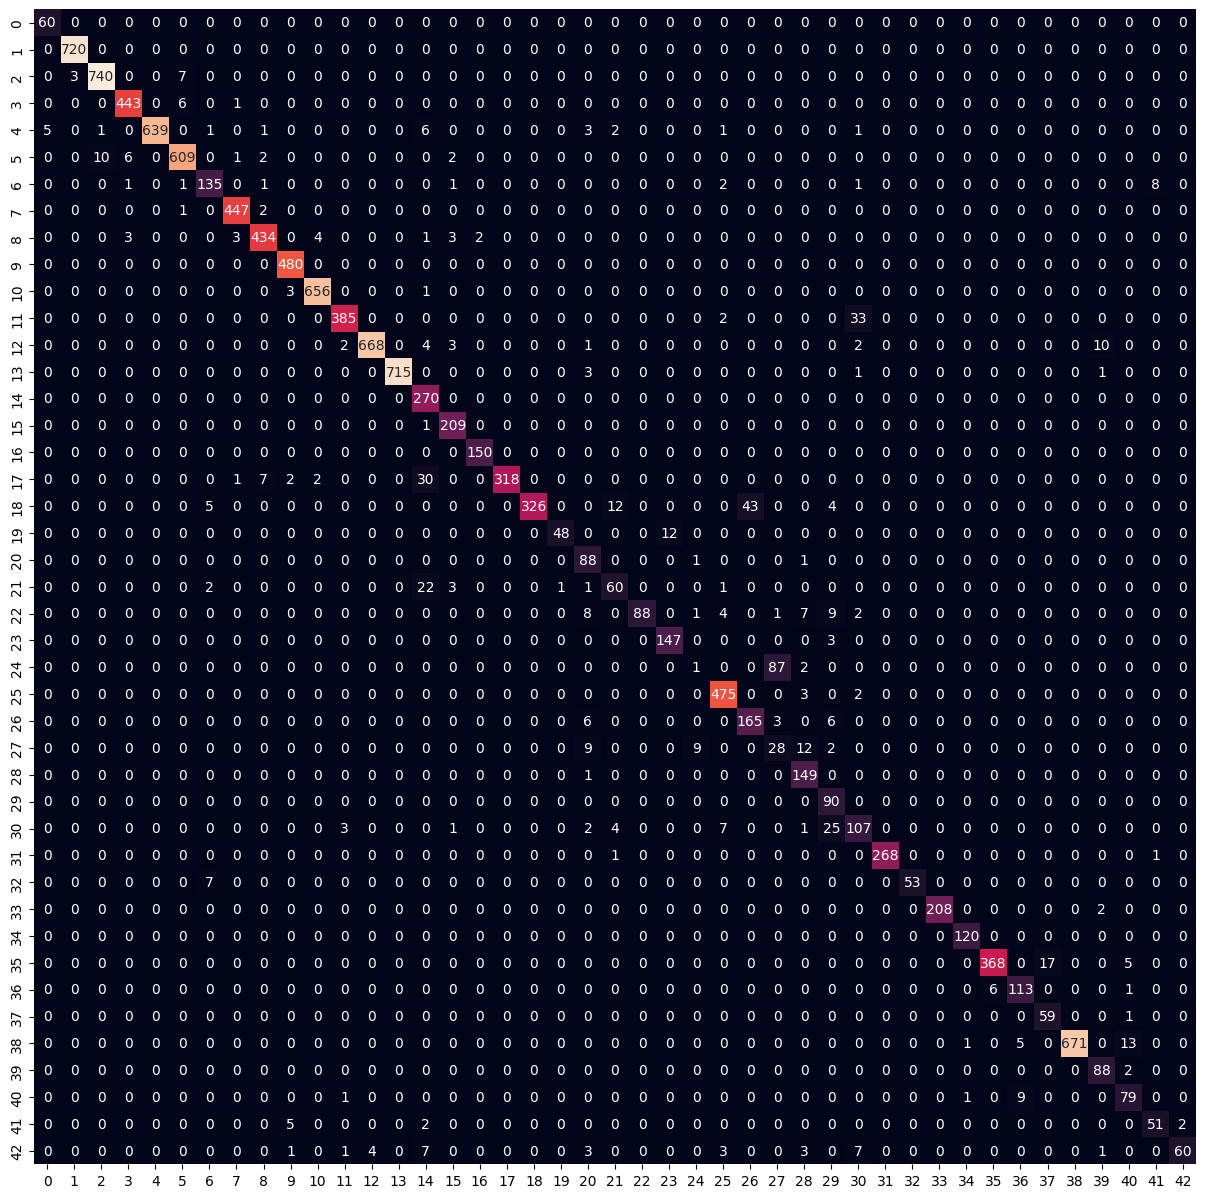

In [77]:
plt.figure(figsize=(15,15))
sns.heatmap(conf_model_1 , annot = True , fmt = '.0f' , cbar = False)

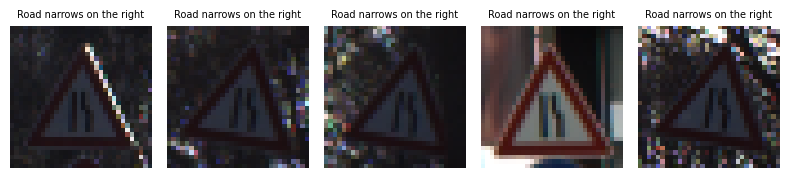

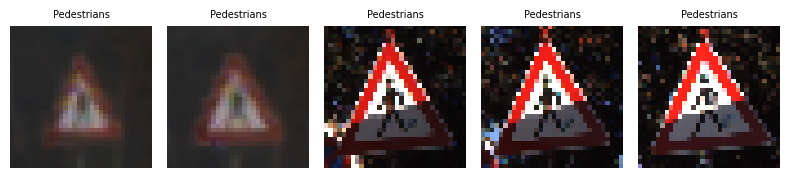

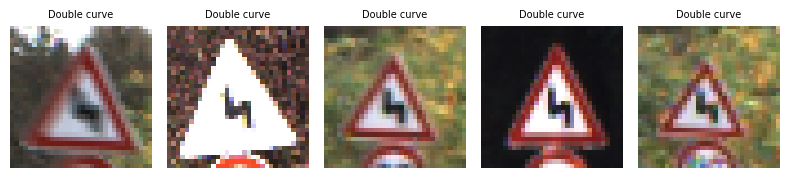

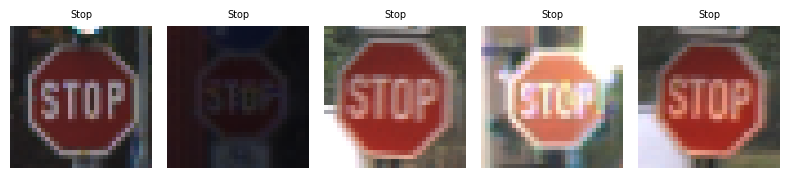

In [87]:
display_random_images(class_index=24, x_data=x_test, y_data=y_test)
display_random_images(class_index=27, x_data=x_test, y_data=y_test)
print('\n')
display_random_images(class_index=21, x_data=x_test, y_data=y_test)
display_random_images(class_index=14, x_data=x_test, y_data=y_test)

In [88]:
conv_layers = {}

for index, layer in enumerate(saved_model.layers):
    if isinstance(layer, (keras.layers.Flatten, keras.layers.Dense)):
        break
    else: 
        conv_layers[index] = layer.name
conv_layers

{0: 'conv2d_24',
 1: 'activation_36',
 2: 'batch_normalization_31',
 3: 'conv2d_25',
 4: 'activation_37',
 5: 'batch_normalization_32',
 6: 'max_pooling2d_12',
 7: 'conv2d_26',
 8: 'activation_38',
 9: 'batch_normalization_33',
 10: 'conv2d_27',
 11: 'activation_39',
 12: 'batch_normalization_34',
 13: 'max_pooling2d_13'}

In [89]:
def plot_feature_map(model , image , conv_class):
    layer_outputs = [layer.output for layer in model.layers[:-1]]  
    activation_model = keras.Model(inputs= model.inputs, outputs=layer_outputs)

    image = image 
    image = np.expand_dims(image, axis=0)  # Thêm chiều batch cho ảnh

    # Gọi mô hình với input để khởi tạo các lớp (tránh lỗi "Sequential model has not been called")
    _ = model.predict(image)  

    # Tính toán feature map
    activations = activation_model.predict(image)

    first_layer_activation = activations[conv_class]
    num_filters = first_layer_activation.shape[-1]

    plt.figure(figsize=(20, 15))
    for i in range(num_filters):
        plt.subplot(8, 8, i+1)
        plt.imshow(first_layer_activation[0, :, :, i] , cmap = 'viridis')
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


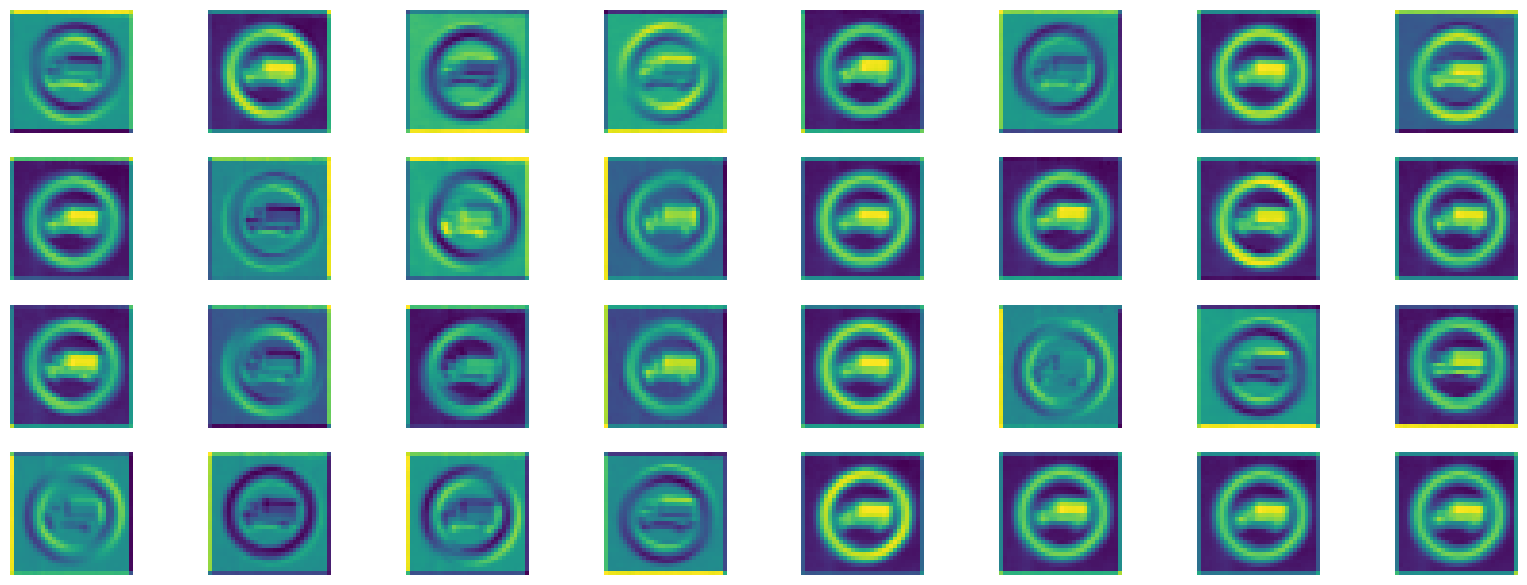

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


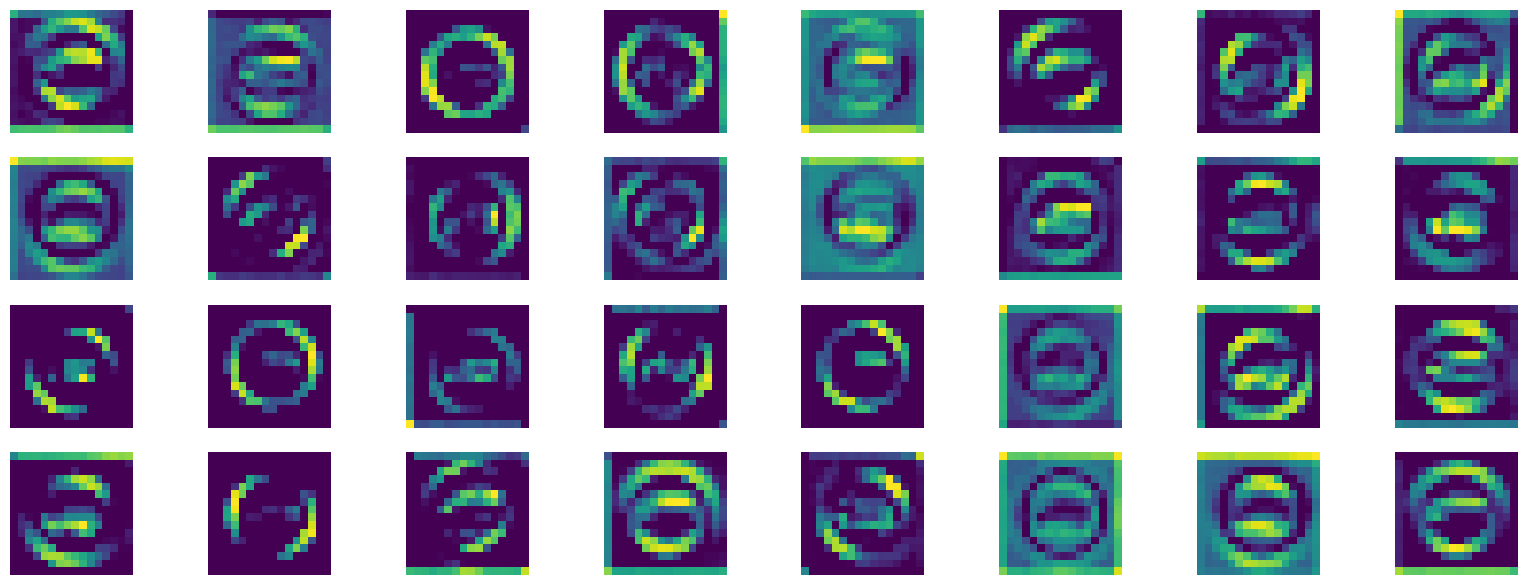

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


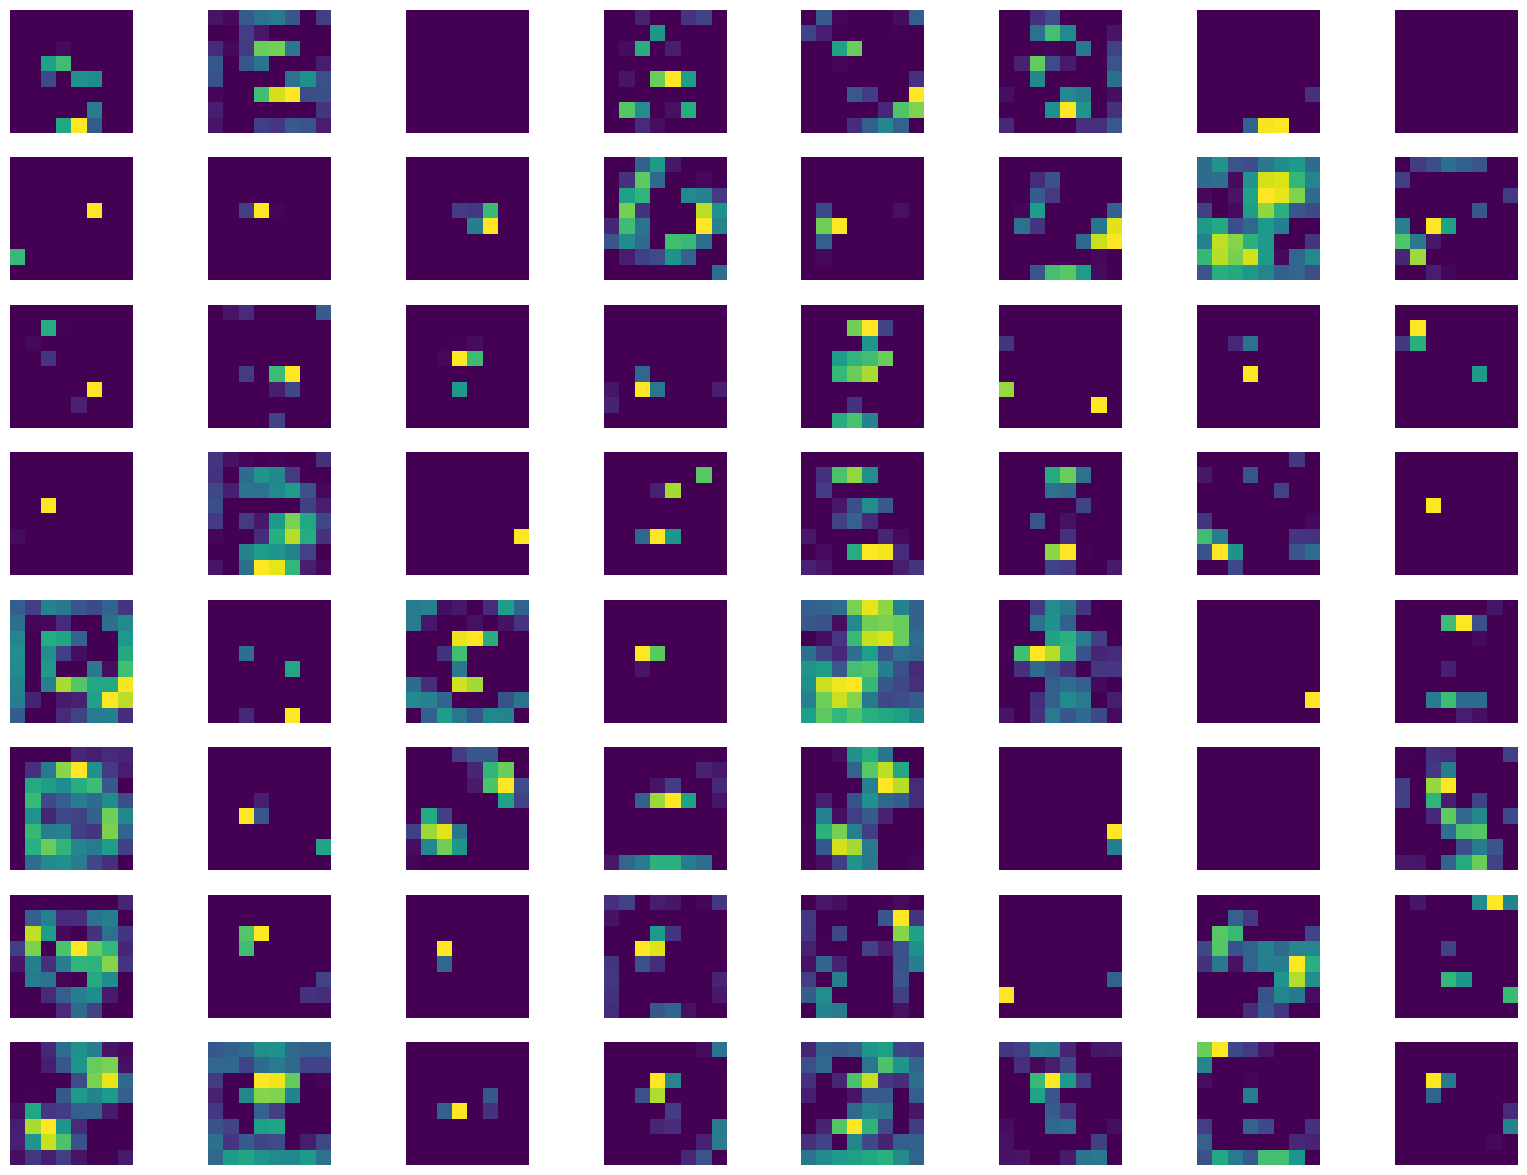

In [91]:
plot_feature_map(saved_model , x_test[0] , 0)
plot_feature_map(saved_model , x_test[0] , 6)
plot_feature_map(saved_model , x_test[0] , 13)

Text(0.5, 1.0, 'Speed limit (120km/h)')

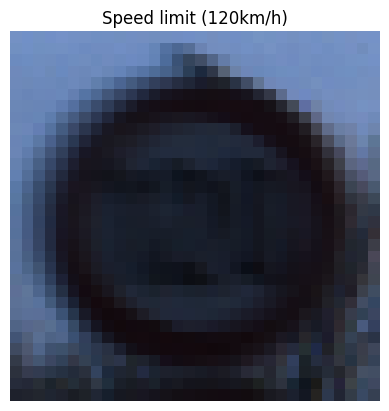

In [99]:
plt.imshow(x_test[328])
plt.axis('off')
label = f'{class_name[y_test[328]]}'
plt.title(label)

In [92]:
y_pred = saved_model.predict(x_test[328:329])
y_pred = np.argmax(y_pred , axis = -1)
class_name[y_pred[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'Speed limit (120km/h)'

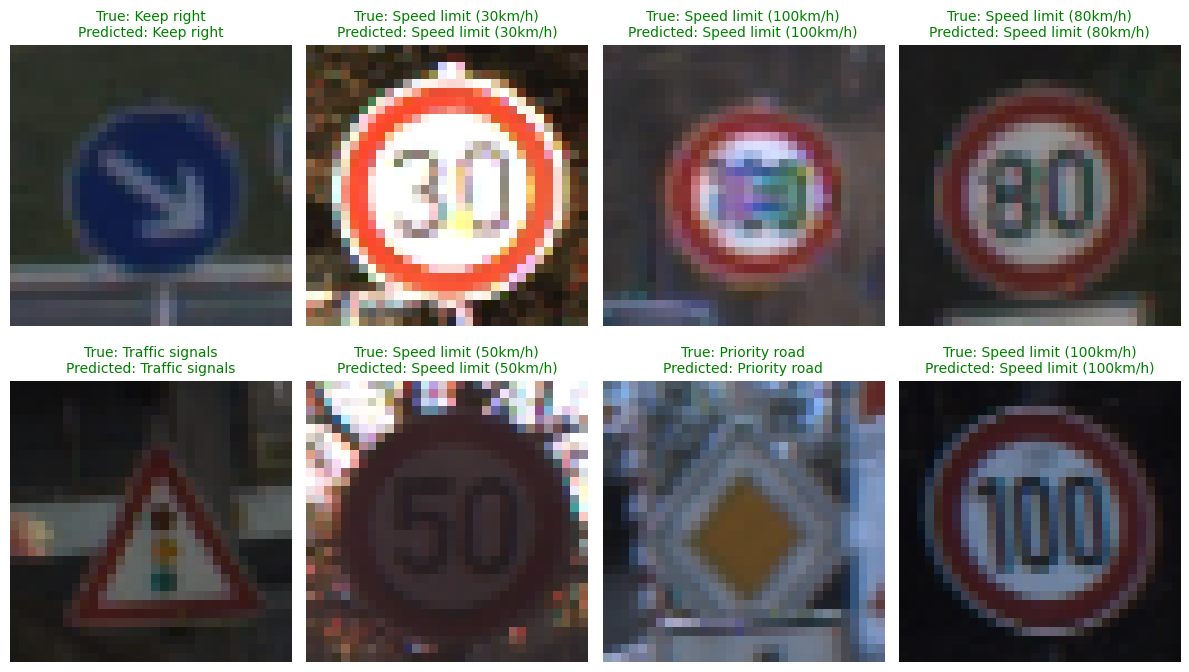

In [97]:
def check_predict (x_data , y_data , y_pred):
  fig , ax = plt.subplots(2,4 , figsize = (12,8))
  for i in range(0,2):
    for j in range (0,4):
      index = np.random.randint(0,len(x_data))
      ax[i,j].imshow(x_data[index])
      ax[i,j].axis('off')
      index_true = class_name[y_data[index]]
      index_predict = class_name[y_pred[index]]
      if(index_true == index_predict):
        color = 'green'
      else:
        color = 'red'
      true_label = f'True: {index_true}'
      predict_label = f'\nPredicted: {index_predict}'
      label = true_label + predict_label
      ax[i,j].set_title(label , color = color , fontsize = 10 )

    plt.tight_layout()

check_predict(x_test,y_test,y_pred_model)

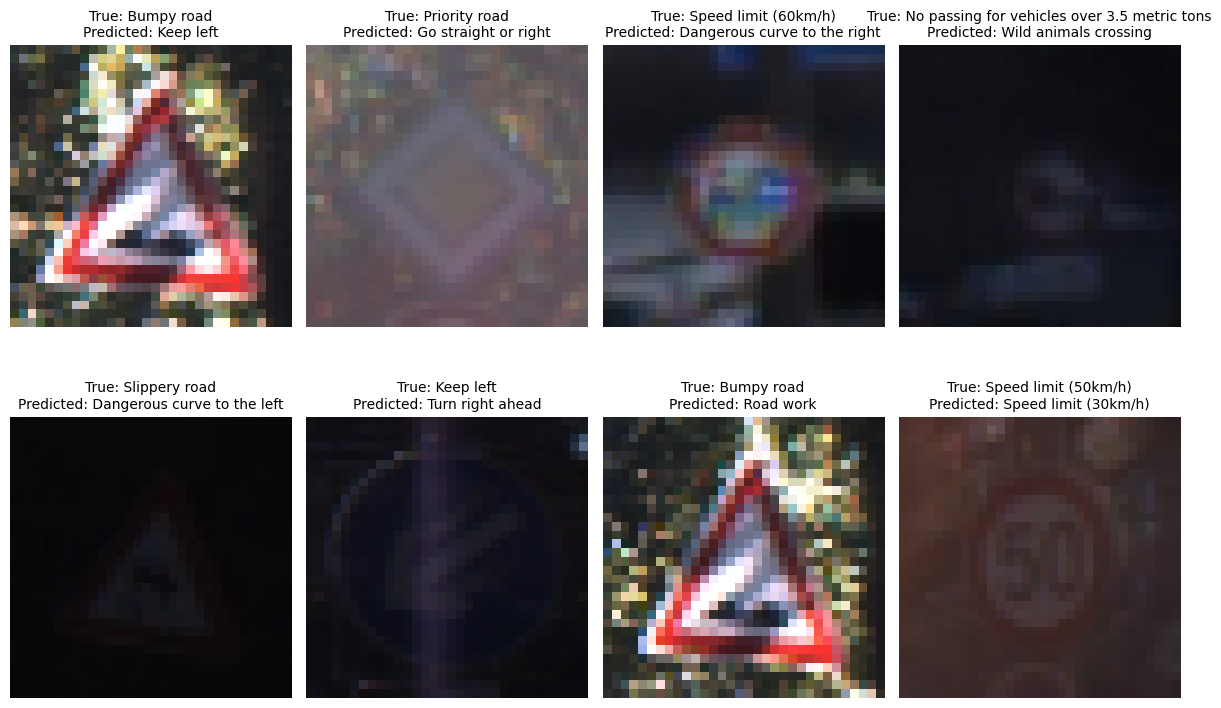

In [122]:
import numpy as np
import matplotlib.pyplot as plt

def check_wrong_predict(model, x_data, y_data, y_pred, class_name):
    wrong_dict = {}
    for index, value in enumerate(y_pred):
        if value != y_data[index]:
            wrong_dict[index] = value

    fig, ax = plt.subplots(2, 4, figsize=(12, 8))
    wrong_indices = list(wrong_dict.keys())
    random_indices = np.random.choice(wrong_indices, size=min(8, len(wrong_indices)), replace=False)

    for i in range(2):
        for j in range(4):
            idx = random_indices[i * 4 + j]
            ax[i, j].imshow(x_data[idx])
            ax[i, j].axis('off')

            index_true = class_name[y_data[idx]]
            index_predict = class_name[y_pred[idx]]
            true_label = f'True: {index_true}'
            predict_label = f'\nPredicted: {index_predict}'
            label = true_label + predict_label
            ax[i, j].set_title(label, fontsize=10)

    plt.tight_layout()
    plt.show()
    
check_wrong_predict(saved_model, x_test, y_test, y_pred_model, class_name)